In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import  DataFrame as df
%matplotlib inline
import seaborn as sns


In [2]:
import numpy as np

In [3]:
import datetime
import random

In [14]:
df2=pd.read_excel('cancer_data6.xlsx',sheet_name='REFERRAL')

In [15]:
refr_dly=pd.read_excel('referal_delays.xlsx')

In [16]:
df2.head()

,LOCAL_PATIENT_IDENTIFIER,SOURCE_OF_REFERRAL_FOR_CANCER,REFERRING_ORGANIZATION_CODE,REFERRER_CODE,CANCER_REFERRAL_PRIORITY_TYPES,REFERRAL_DESION_DATE,REFERRAL_REQUEST_RECEIVED_DATE_DF,CONSULTANT_CODE,MAIN_SPECIALITY_CODE,DATE_FIRST_SEEN,DELAY_REASON_REFERRAL_TO_FIRST_SEEN_(CANCER),URGENT CANCER REFERRAL TYPE,CANCER STATUS,WAITING_TIME_ADJUSTMENT(FIRST_SEEN)_strg,WAITING TIME ADJUSTMENT REASON (FIRST SEEN)
0,L_CPP100,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2016-12-28 13:37:09,2017-01-06 21:37:09,GMP-DR3,823_HAEMATOLOGY,2017-01-26 05:37:09,02_Out-patient capacity inadequate,15_Other suspected cancer,7_diagnosis of new cancer confirmed - no treat...,19 days 08:00:00,Did Not Attend
1,R_CPP101,03_Referral from Consultant,GP_Practice,GP_DR2,02_Urgency,2016-12-30 18:06:57,2017-01-07 09:06:57,GMP-DR4,824_HISTOPATHOLOGY,2017-01-29 18:06:57,99_Other,14_Suspected sarcomas,6_diagnosis of new cancer confirmed - treatmen...,22 days 09:00:00,Patient Choice
2,L_CPP102,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2016-12-29 22:13:24,2017-01-08 00:13:24,GMP-DR3,823_HAEMATOLOGY,2017-02-13 09:13:24,03_Administrative delay,14_Suspected sarcomas,1_suspected cancer1_suspected cancer,36 days 09:00:00,Did Not Attend
3,L_CPP103,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2016-12-29 17:48:52,2017-01-08 02:48:52,GMP-DR1,370_MEDICAL ONCOLOGY,2017-01-31 09:48:52,02_Out-patient capacity inadequate,01_Suspected breast cancer,1_suspected cancer,28 days 16:38:00,Suspension - medical reasons
4,L_CPP104,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2016-12-31 07:11:12,2017-01-08 05:11:12,GMP-DR3,823_HAEMATOLOGY,2017-01-27 15:11:12,02_Out-patient capacity inadequate,15_Other suspected cancer,5_diagnosis of new cancer confirmed - treatmen...,24 days 19:38:00,Suspension - medical reasons


In [316]:
delay_reason=refr_dly.groupby(['DELAY_REASON_REFERRAL_TO_FIRST_SEEN_(CANCER)']).count()

In [317]:
delay_reason.head()

,LOCAL_PATIENT_IDENTIFIER,SOURCE_OF_REFERRAL_FOR_CANCER,REFERRING_ORGANIZATION_CODE,REFERRER_CODE,CANCER_REFERRAL_PRIORITY_TYPES,REFERRAL_DESION_DATE,REFERRAL_REQUEST_RECEIVED_DATE_DF,CONSULTANT_CODE,MAIN_SPECIALITY_CODE,DATE_FIRST_SEEN,...,delay14_decisionToTreat_chemo&investigationREsultdate,delay15_,delay15_startDate_chemo&decisionToTreat_chemo,delay16_decisionToTreat_tele&StartDate_chemo,delay17_StartDAte_tele&treatDate_tele,delay18_treatDateBrach&StartDate_tele,delay19_startDate_brach&treatDate_brach,delay20_endDate_brach&StartDate_brach,delay21_statusAssesmentDate&EndDate_brach,delay22_DeathDate&AssesmentDate
DELAY_REASON_REFERRAL_TO_FIRST_SEEN_(CANCER),,,,,,,,,,,,,,,,,,,,,
02_Out-patient capacity inadequate,230,230,230,230,230,230,230,230,230,166,...,166,166,166,166,166,166,166,166,166,166
03_Administrative delay,267,267,267,267,267,267,267,267,267,193,...,193,193,193,193,193,193,193,193,193,193
99_Other,403,403,403,403,403,403,403,403,403,266,...,266,266,266,266,266,266,266,266,266,266


In [318]:
tp=delay_reason[['LOCAL_PATIENT_IDENTIFIER']].reset_index()

In [319]:
tp.reset_index()

,index,DELAY_REASON_REFERRAL_TO_FIRST_SEEN_(CANCER),LOCAL_PATIENT_IDENTIFIER
0,0,02_Out-patient capacity inadequate,230
1,1,03_Administrative delay,267
2,2,99_Other,403


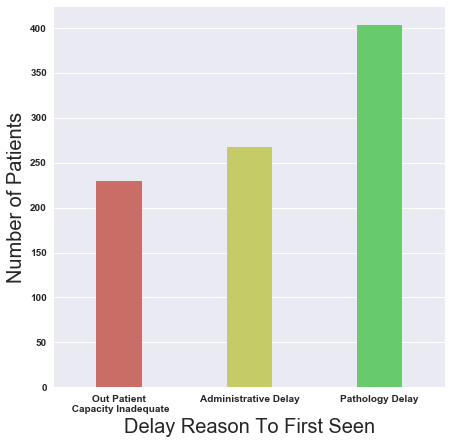

In [321]:
fig,ax=plt.subplots(figsize=(7,7))
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())
s1=sns.barplot(x=tp["DELAY_REASON_REFERRAL_TO_FIRST_SEEN_(CANCER)"],y=tp["LOCAL_PATIENT_IDENTIFIER"],palette=sns.hls_palette(n_colors=6, h=0.01, l=0.6, s=0.65))
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
s1.set_xticklabels(["Out Patient\n Capacity Inadequate",'Administrative Delay','Pathology Delay'])
xlabels = ax.get_xticklabels()
plt.setp(xlabels, fontsize=10,weight='semibold')
ylabels = ax.get_yticklabels()
plt.setp(ylabels, fontsize=10,weight='semibold')
change_width(ax, .35)
s1.set_xlabel("Delay Reason To First Seen",fontsize=20)
s1.set_ylabel("Number of Patients",fontsize=20)
fig.savefig('delayreason.png')
plt.show()

In [163]:
df15org=pd.read_excel("cancer_data6.xlsx",sheet_name='Death Details')

In [144]:
df15=pd.read_excel("example_death_details.xlsx")

In [70]:
df4=pd.read_excel('cancer_data6.xlsx',sheet_name='DIAGNOSIS')

In [152]:
def fun1(x):
    if str(x['PERSON DEATH DATE1'])=="-":
        return None
    if str(x['PERSON DEATH DATE1'])!="-":
        return pd.to_datetime(x['PERSON DEATH DATE1'])-pd.to_datetime(x['DIAGNOSIS DATE (CANCER)'])

In [151]:
def fun4(x):
    if str(x['PERSON DEATH DATE1'])=="-":
        return True
    else:
        return False

In [168]:
def fun2(x):
    if str(x['PERSON DEATH DATE1'])=="-":
        return False
    if type(x['PERSON DEATH DATE1'])==datetime.datetime:
        return True

In [196]:
tempdf=pd.DataFrame({"x":np.arange(0,5),"y":np.arange(10,15)})

In [199]:
tempdf[[True,False,True,False,True]]

,x,y
0,0,10
2,2,12
4,4,14


In [202]:
bools=temp.apply(fun2,axis=1).dropna()#boolean values of deceased patients

In [205]:
df2[bools].to_excel("Deceased_patients.xlsx",index=None)

In [297]:
df1=pd.read_excel('cancer_data6_1.xlsx',sheet_name="DEMOGRAPHICS")
df2=pd.read_excel('cancer_data6_1.xlsx',sheet_name='REFERRAL')
df3=pd.read_excel('cancer_data6_1.xlsx',sheet_name='IMAGING')
df4=pd.read_excel('cancer_data6_1.xlsx',sheet_name='DIAGNOSIS')
df5=pd.read_excel('cancer_data6_1.xlsx',sheet_name='CANCER CARE PLAN')
df6=pd.read_excel('cancer_data6_1.xlsx',sheet_name='Staging')
df7=pd.read_excel('cancer_data6_1.xlsx',sheet_name='Surgery&other procedures')
df8=pd.read_excel('cancer_data6_1.xlsx',sheet_name='Pathology Details')
df9=pd.read_excel("cancer_data6_1.xlsx",sheet_name="chemotheropy & other drugs")
df10=pd.read_excel("cancer_data6_1.xlsx",sheet_name="Radiotherapy(Teletherapy)")
df11=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Radiotherapy(Brachytherapy)')
df12=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Palliative Care')
df13=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Clinical Trials')
df14=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Clinical Status Assesment')
df15=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Death Details')

In [285]:
df1=pd.read_excel('cancer_data6.xlsx',sheet_name="DEMOGRAPHICS")
df2=pd.read_excel('cancer_data6.xlsx',sheet_name='REFERRAL')
df3=pd.read_excel('cancer_data6.xlsx',sheet_name='IMAGING')
df4=pd.read_excel('cancer_data6.xlsx',sheet_name='DIAGNOSIS')
df5=pd.read_excel('cancer_data6.xlsx',sheet_name='CANCER CARE PLAN')
df6=pd.read_excel('cancer_data6.xlsx',sheet_name='Staging')
df7=pd.read_excel('cancer_data6.xlsx',sheet_name='Surgery&other procedures')
df8=pd.read_excel('cancer_data6.xlsx',sheet_name='Pathology Details')
df9=pd.read_excel("cancer_data6.xlsx",sheet_name="chemotheropy & other drugs")
df10=pd.read_excel("cancer_data6.xlsx",sheet_name="Radiotherapy(Teletherapy)")
df11=pd.read_excel("cancer_data6.xlsx",sheet_name='Radiotherapy(Brachytherapy)')
df12=pd.read_excel("cancer_data6.xlsx",sheet_name='Palliative Care')
df13=pd.read_excel("cancer_data6.xlsx",sheet_name='Clinical Trials')
df14=pd.read_excel("cancer_data6.xlsx",sheet_name='Clinical Status Assesment')
df15=pd.read_excel("cancer_data6.xlsx",sheet_name='Death Details')

In [286]:
df2=df2.iloc[0:624,:]

In [287]:
df3=df3.iloc[0:624,:]

In [288]:
df4=df4.iloc[0:624,:]

In [289]:
df5=df5.iloc[0:624,:]

In [290]:
df6=df6.iloc[0:624,:]

In [291]:
df7=df7.iloc[0:624,:]

In [292]:
df8=df8.iloc[0:624,:]

In [293]:
df9=df9.iloc[0:624,:]

In [294]:
df10=df10.iloc[0:624,:]

In [295]:
df11=df11.iloc[0:624,:]
df12=df12.iloc[0:624,:]
df13=df13.iloc[0:624,:]
df14=df14.iloc[0:624,:]
df15=df15.iloc[0:624,:]

In [296]:
writer = pd.ExcelWriter('cancer_data6_1.xlsx', engine='xlsxwriter')
df1.to_excel(writer,sheet_name="DEMOGRAPHICS",index=None)
df2.to_excel(writer,sheet_name='REFERRAL',index=None)
df3.to_excel(writer,sheet_name='IMAGING',index=None)
df4.to_excel(writer,sheet_name='DIAGNOSIS',index=None)
df5.to_excel(writer,sheet_name='CANCER CARE PLAN',index=None)
df6.to_excel(writer,sheet_name='Staging',index=None)
df7.to_excel(writer,sheet_name='Surgery&other procedures',index=None)
df8.to_excel(writer,sheet_name='Pathology Details',index=None)
df9.to_excel(writer,sheet_name='chemotheropy & other drugs',index=None)
df10.to_excel(writer,sheet_name='Radiotherapy(Teletherapy)',index=None)
df11.to_excel(writer,sheet_name='Radiotherapy(Brachytherapy)',index=None)
df12.to_excel(writer,sheet_name='Palliative Care',index=None)
df13.to_excel(writer,sheet_name='Clinical Trials',index=None)
df14.to_excel(writer,sheet_name='Clinical Status Assesment',index=None)
df15.to_excel(writer,sheet_name='Death Details',index=None)
writer.save()

In [299]:
df1=df1[bools]
df2=df2[bools]
df3=df3[bools]
df4=df4[bools]
df5=df5[bools]
df6=df6[bools]
df7=df7[bools]
df8=df8[bools]
df9=df9[bools]
df10=df10[bools]
df11=df11[bools]
df12=df12[bools]
df13=df13[bools]
df14=df14[bools]
df15=df15[bools]

C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

In [283]:
df2

,LOCAL_PATIENT_IDENTIFIER,SOURCE_OF_REFERRAL_FOR_CANCER,REFERRING_ORGANIZATION_CODE,REFERRER_CODE,CANCER_REFERRAL_PRIORITY_TYPES,REFERRAL_DESION_DATE,REFERRAL_REQUEST_RECEIVED_DATE_DF,CONSULTANT_CODE,MAIN_SPECIALITY_CODE,DATE_FIRST_SEEN,DELAY_REASON_REFERRAL_TO_FIRST_SEEN_(CANCER),URGENT CANCER REFERRAL TYPE,CANCER STATUS,WAITING_TIME_ADJUSTMENT(FIRST_SEEN)_strg,WAITING TIME ADJUSTMENT REASON (FIRST SEEN)
1,R_CPP101,03_Referral from Consultant,GP_Practice,GP_DR2,02_Urgency,2017-01-01 23:28:57,2017-01-07 09:06:57,GMP-DR4,824_HISTOPATHOLOGY,2017-01-29 18:06:57,99_Other,14_Suspected sarcomas,6_diagnosis of new cancer confirmed - treatmen...,22 days 09:00:00,Patient Choice
2,L_CPP102,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-02 14:35:24,2017-01-08 00:13:24,GMP-DR3,823_HAEMATOLOGY,2017-02-13 09:13:24,03_Administrative delay,14_Suspected sarcomas,1_suspected cancer1_suspected cancer,36 days 09:00:00,Did Not Attend
3,L_CPP103,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-02 17:10:52,2017-01-08 02:48:52,GMP-DR1,370_MEDICAL ONCOLOGY,2017-01-31 09:48:52,02_Out-patient capacity inadequate,01_Suspected breast cancer,1_suspected cancer,28 days 16:38:00,Suspension - medical reasons
4,L_CPP104,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-02 19:33:12,2017-01-08 05:11:12,GMP-DR3,823_HAEMATOLOGY,2017-01-27 15:11:12,02_Out-patient capacity inadequate,15_Other suspected cancer,5_diagnosis of new cancer confirmed - treatmen...,24 days 19:38:00,Suspension - medical reasons
6,R_CPP106,05_Private Health Care,GP_Practice,GP_DR2,01_Urgent,2017-01-03 10:29:21,2017-01-08 20:07:21,GMP-DR2,800_ CLINICAL ONCOLOGY,2017-01-29 06:07:21,99_Other,01_Suspected breast cancer,5_diagnosis of new cancer confirmed - treatmen...,25 days 19:38:00,Suspension - medical reasons
8,R_CPP108,03_Referral from Consultant,GP_Practice,GP_DR7,01_Urgent,2017-01-05 13:25:59,2017-01-10 23:03:59,GMP-DR3,823_HAEMATOLOGY,2017-02-15 09:03:59,99_Other,04_Suspected head and neck cancers,1_suspected cancer1_suspected cancer,35 days 10:00:00,Did Not Attend
9,L_CPP109,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-05 17:34:41,2017-01-11 03:12:41,GMP-DR4,824_HISTOPATHOLOGY,2017-02-16 10:12:41,02_Out-patient capacity inadequate,15_Other suspected cancer,6_diagnosis of new cancer confirmed - treatmen...,41 days 16:38:00,Suspension - medical reasons
12,L_CPP112,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-06 02:25:55,2017-01-11 12:03:55,GMP-DR4,824_HISTOPATHOLOGY,2017-02-05 22:03:55,02_Out-patient capacity inadequate,01_Suspected breast cancer,5_diagnosis of new cancer confirmed - treatmen...,25 days 10:00:00,Patient Choice
13,L_CPP113,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-06 09:01:12,2017-01-11 18:39:12,GMP-DR2,800_ CLINICAL ONCOLOGY,2017-02-05 03:39:12,03_Administrative delay,14_Suspected sarcomas,5_diagnosis of new cancer confirmed - treatmen...,29 days 18:38:00,Suspension - patient reasons
16,L_CPP116,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-06 18:15:47,2017-01-12 03:53:47,GMP-DR2,800_ CLINICAL ONCOLOGY,2017-02-05 12:53:47,02_Out-patient capacity inadequate,04_Suspected head and neck cancers,3_no new cancer diagnosis identified by the Trust,29 days 18:38:00,Suspension - medical reasons


In [314]:
writer = pd.ExcelWriter('deceased_pat.xlsx', engine='xlsxwriter')
df1.to_excel(writer,sheet_name="DEMOGRAPHICS",index=None)
df2.to_excel(writer,sheet_name='REFERRAL',index=None)
df3.to_excel(writer,sheet_name='IMAGING',index=None)
df4.to_excel(writer,sheet_name='DIAGNOSIS',index=None)
df5.to_excel(writer,sheet_name='CANCER CARE PLAN',index=None)
df6.to_excel(writer,sheet_name='Staging',index=None)
df7.to_excel(writer,sheet_name='Surgery&other procedures',index=None)
df8.to_excel(writer,sheet_name='Pathology Details',index=None)
df9.to_excel(writer,sheet_name='chemotheropy & other drugs',index=None)
df10.to_excel(writer,sheet_name='Radiotherapy(Teletherapy)',index=None)
df11.to_excel(writer,sheet_name='Radiotherapy(Brachytherapy)',index=None)
df12.to_excel(writer,sheet_name='Palliative Care',index=None)
df13.to_excel(writer,sheet_name='Clinical Trials',index=None)
df14.to_excel(writer,sheet_name='Clinical Status Assesment',index=None)
df15.to_excel(writer,sheet_name='Death Details',index=None)
writer.save()

In [191]:
temp=pd.concat([df15org['PERSON DEATH DATE1'],df4['DIAGNOSIS DATE (CANCER)']],axis=1)

In [234]:
bools_copy=bools.copy()

In [301]:
alive_bool=bools.apply(lambda x:not(x))

In [302]:
bools=alive_bool

In [305]:
bools

0       True
1      False
2      False
3      False
4      False
5       True
6      False
7       True
8      False
9      False
10      True
11      True
12     False
13     False
14      True
15      True
16     False
17     False
18     False
19     False
20      True
21      True
22      True
23     False
24     False
25      True
26     False
27     False
28      True
29     False
       ...  
595     True
596    False
597    False
598    False
599    False
600     True
601    False
602     True
603    False
604    False
605     True
606    False
607    False
608    False
609     True
610     True
611    False
612    False
613    False
614    False
615     True
616     True
617    False
618    False
619    False
620     True
621    False
622    False
623     True
624    False
Length: 625, dtype: bool

In [309]:
df1=pd.read_excel('cancer_data6_1.xlsx',sheet_name="DEMOGRAPHICS")
df2=pd.read_excel('cancer_data6_1.xlsx',sheet_name='REFERRAL')
df3=pd.read_excel('cancer_data6_1.xlsx',sheet_name='IMAGING')
df4=pd.read_excel('cancer_data6_1.xlsx',sheet_name='DIAGNOSIS')
df5=pd.read_excel('cancer_data6_1.xlsx',sheet_name='CANCER CARE PLAN')
df6=pd.read_excel('cancer_data6_1.xlsx',sheet_name='Staging')
df7=pd.read_excel('cancer_data6_1.xlsx',sheet_name='Surgery&other procedures')
df8=pd.read_excel('cancer_data6_1.xlsx',sheet_name='Pathology Details')
df9=pd.read_excel("cancer_data6_1.xlsx",sheet_name="chemotheropy & other drugs")
df10=pd.read_excel("cancer_data6_1.xlsx",sheet_name="Radiotherapy(Teletherapy)")
df11=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Radiotherapy(Brachytherapy)')
df12=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Palliative Care')
df13=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Clinical Trials')
df14=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Clinical Status Assesment')
df15=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Death Details')

In [313]:
df15

,LOCAL_PATIENT_IDENTIFIER,PERSON DEATH DATE,PERSON DEATH DATE1,DEATH LOCATION TYPE,DEATH CAUSE IDENTIFICATION METHOD,DEATH CAUSE CODE (IMMEDIATE),DEATH CAUSE CODE (CONDITION),DEATH CAUSE CODE (UNDERLYING),DEATH CAUSE CODE (SIGNIFICANT),DEATH CODE DISCREPANCY ORIGINATOR
0,L_CPP100,2017-11-09,2017-11-09 00:00:00,3_Voluntary hospice / specialist palliative ca...,3_Hospital records,ICD-4,ICD-4,ICD-4,ICD-4,11- There is a discrepancy between the hospita...
5,L_CPP105,2017-11-24,2017-11-24 00:00:00,1_Hospital,2_NHS Central Register Follow-up,ICD-6,ICD-6,ICD-6,ICD-6,11- There is a discrepancy between the hospita...
7,L_CPP107,2017-12-03,2017-12-03 00:00:00,3_Voluntary hospice / specialist palliative ca...,4_Verbal communication,ICD-7,ICD-7,ICD-7,ICD-7,11- There is a discrepancy between the hospita...
10,L_CPP110,2017-11-25,2017-11-25 00:00:00,2_NHS hospice / specialist palliative care unit,3_Hospital records,ICD-5,ICD-5,ICD-5,ICD-5,10- There is a discrepancy between the hospita...
11,L_CPP111,2017-12-02,2017-12-02 00:00:00,2_NHS hospice / specialist palliative care unit,5_Post mortem,ICD-6,ICD-6,ICD-6,ICD-6,11- There is a discrepancy between the hospita...
14,L_CPP114,2017-12-02,2017-12-02 00:00:00,1_Hospital,1_Death certificate,ICD-7,ICD-7,ICD-7,ICD-7,10- There is a discrepancy between the hospita...
15,L_CPP115,2017-12-07,2017-12-07 00:00:00,3_Voluntary hospice / specialist palliative ca...,2_NHS Central Register Follow-up,ICD-7,ICD-7,ICD-7,ICD-7,11- There is a discrepancy between the hospita...
20,R_CPP120,2017-11-11,2017-11-11 00:00:00,1_Hospital,5_Post mortem,ICD-6,ICD-6,ICD-6,ICD-6,10- There is a discrepancy between the hospita...
21,R_CPP121,2017-11-19,2017-11-19 00:00:00,5_Care home,2_NHS Central Register Follow-up,ICD-4,ICD-4,ICD-4,ICD-4,10- There is a discrepancy between the hospita...
22,L_CPP122,2017-12-17,2017-12-17 00:00:00,5_Care home,5_Post mortem,ICD-4,ICD-4,ICD-4,ICD-4,10- There is a discrepancy between the hospita...


In [311]:
df1=df1[bools]
df2=df2[bools]
df3=df3[bools]
df4=df4[bools]
df5=df5[bools]
df6=df6[bools]
df7=df7[bools]
df8=df8[bools]
df9=df9[bools]
df10=df10[bools]
df11=df11[bools]
df12=df12[bools]
df13=df13[bools]
df14=df14[bools]
df15=df15[bools]

C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

In [300]:
writer = pd.ExcelWriter('alive_pat.xlsx', engine='xlsxwriter')
df1.to_excel(writer,sheet_name="DEMOGRAPHICS",index=None)
df2.to_excel(writer,sheet_name='REFERRAL',index=None)
df3.to_excel(writer,sheet_name='IMAGING',index=None)
df4.to_excel(writer,sheet_name='DIAGNOSIS',index=None)
df5.to_excel(writer,sheet_name='CANCER CARE PLAN',index=None)
df6.to_excel(writer,sheet_name='Staging',index=None)
df7.to_excel(writer,sheet_name='Surgery&other procedures',index=None)
df8.to_excel(writer,sheet_name='Pathology Details',index=None)
df9.to_excel(writer,sheet_name='chemotheropy & other drugs',index=None)
df10.to_excel(writer,sheet_name='Radiotherapy(Teletherapy)',index=None)
df11.to_excel(writer,sheet_name='Radiotherapy(Brachytherapy)',index=None)
df12.to_excel(writer,sheet_name='Palliative Care',index=None)
df13.to_excel(writer,sheet_name='Clinical Trials',index=None)
df14.to_excel(writer,sheet_name='Clinical Status Assesment',index=None)
df15.to_excel(writer,sheet_name='Death Details',index=None)
writer.save()

In [251]:
def1=pd.read_excel('deceased_pat.xlsx',sheet_name="DEMOGRAPHICS")
def2=pd.read_excel('deceased_pat.xlsx',sheet_name='REFERRAL')
def3=pd.read_excel('deceased_pat.xlsx',sheet_name='IMAGING')
def4=pd.read_excel('deceased_pat.xlsx',sheet_name='DIAGNOSIS')
def5=pd.read_excel('deceased_pat.xlsx',sheet_name='CANCER CARE PLAN')
def6=pd.read_excel('deceased_pat.xlsx',sheet_name='Staging')
def7=pd.read_excel('deceased_pat.xlsx',sheet_name='Surgery&other procedures')
def8=pd.read_excel('deceased_pat.xlsx',sheet_name='Pathology Details')
def9=pd.read_excel("deceased_pat.xlsx",sheet_name="chemotheropy & other drugs")
def10=pd.read_excel("deceased_pat.xlsx",sheet_name="Radiotherapy(Teletherapy)")
def11=pd.read_excel("deceased_pat.xlsx",sheet_name='Radiotherapy(Brachytherapy)')
def12=pd.read_excel("deceased_pat.xlsx",sheet_name='Palliative Care')
def13=pd.read_excel("deceased_pat.xlsx",sheet_name='Clinical Trials')
def14=pd.read_excel("deceased_pat.xlsx",sheet_name='Clinical Status Assesment')
def15=pd.read_excel("deceased_pat.xlsx",sheet_name='Death Details')

In [266]:
df2.dropna()

,LOCAL_PATIENT_IDENTIFIER,SOURCE_OF_REFERRAL_FOR_CANCER,REFERRING_ORGANIZATION_CODE,REFERRER_CODE,CANCER_REFERRAL_PRIORITY_TYPES,REFERRAL_DESION_DATE,REFERRAL_REQUEST_RECEIVED_DATE_DF,CONSULTANT_CODE,MAIN_SPECIALITY_CODE,DATE_FIRST_SEEN,DELAY_REASON_REFERRAL_TO_FIRST_SEEN_(CANCER),URGENT CANCER REFERRAL TYPE,CANCER STATUS,WAITING_TIME_ADJUSTMENT(FIRST_SEEN)_strg,WAITING TIME ADJUSTMENT REASON (FIRST SEEN)
0,L_CPP100,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-01 11:59:09,2017-01-06 21:37:09,GMP-DR3,823_HAEMATOLOGY,2017-01-26 05:37:09,02_Out-patient capacity inadequate,15_Other suspected cancer,7_diagnosis of new cancer confirmed - no treat...,19 days 08:00:00,Did Not Attend
1,R_CPP101,03_Referral from Consultant,GP_Practice,GP_DR2,02_Urgency,2017-01-01 23:28:57,2017-01-07 09:06:57,GMP-DR4,824_HISTOPATHOLOGY,2017-01-29 18:06:57,99_Other,14_Suspected sarcomas,6_diagnosis of new cancer confirmed - treatmen...,22 days 09:00:00,Patient Choice
2,L_CPP102,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-02 14:35:24,2017-01-08 00:13:24,GMP-DR3,823_HAEMATOLOGY,2017-02-13 09:13:24,03_Administrative delay,14_Suspected sarcomas,1_suspected cancer1_suspected cancer,36 days 09:00:00,Did Not Attend
3,L_CPP103,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-02 17:10:52,2017-01-08 02:48:52,GMP-DR1,370_MEDICAL ONCOLOGY,2017-01-31 09:48:52,02_Out-patient capacity inadequate,01_Suspected breast cancer,1_suspected cancer,28 days 16:38:00,Suspension - medical reasons
4,L_CPP104,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-02 19:33:12,2017-01-08 05:11:12,GMP-DR3,823_HAEMATOLOGY,2017-01-27 15:11:12,02_Out-patient capacity inadequate,15_Other suspected cancer,5_diagnosis of new cancer confirmed - treatmen...,24 days 19:38:00,Suspension - medical reasons
5,L_CPP105,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-03 02:32:53,2017-01-08 12:10:53,GMP-DR2,800_ CLINICAL ONCOLOGY,2017-01-31 20:10:53,03_Administrative delay,15_Other suspected cancer,6_diagnosis of new cancer confirmed - treatmen...,23 days 08:00:00,Patient cancellation
6,R_CPP106,05_Private Health Care,GP_Practice,GP_DR2,01_Urgent,2017-01-03 10:29:21,2017-01-08 20:07:21,GMP-DR2,800_ CLINICAL ONCOLOGY,2017-01-29 06:07:21,99_Other,01_Suspected breast cancer,5_diagnosis of new cancer confirmed - treatmen...,25 days 19:38:00,Suspension - medical reasons
7,L_CPP107,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-04 23:17:02,2017-01-10 08:55:02,GMP-DR2,800_ CLINICAL ONCOLOGY,2017-01-29 16:55:02,03_Administrative delay,03_Suspected lung cancer,1_suspected cancer1_suspected cancer,19 days 08:00:00,Did Not Attend
8,R_CPP108,03_Referral from Consultant,GP_Practice,GP_DR7,01_Urgent,2017-01-05 13:25:59,2017-01-10 23:03:59,GMP-DR3,823_HAEMATOLOGY,2017-02-15 09:03:59,99_Other,04_Suspected head and neck cancers,1_suspected cancer1_suspected cancer,35 days 10:00:00,Did Not Attend
9,L_CPP109,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,2017-01-05 17:34:41,2017-01-11 03:12:41,GMP-DR4,824_HISTOPATHOLOGY,2017-02-16 10:12:41,02_Out-patient capacity inadequate,15_Other suspected cancer,6_diagnosis of new cancer confirmed - treatmen...,41 days 16:38:00,Suspension - medical reasons


In [166]:
import pylab
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())
lst=['DIAGNOSIS DATE (CANCER)','CANCER REFERRAL DECISION DATE',"REFERRAL REQUEST RECEIVED DATE",\
     'CLINICAL INTERVENTION DATE \n(CANCER IMAGING)','DATE FIRST SEEN','MULTIDISCIPLINARY TEAM\n DISCUSSION DATE',\
     'CARE PLAN AGREED DATE']
names = lst
fig,ax=plt.subplots(figsize=(20,19))
for i in range(0,620):
    l1=df(sum_days.iloc[i,0:]).values
    l1=np.insert(l1,0,0)
    days = l1[0:7]
    
    x = range(len(lst))
    plt.xticks(x, names)
    plt.plot(x,days,color=uniqueish_color(),marker='o',markerfacecolor="b",markeredgewidth=4,markersize=12,label="patient-"+str(i))
plt.title("First Level Delay",fontsize=30,style='oblique',weight='heavy')
plt.xlabel("Sub Level Delays",fontsize=27,weight='bold')
plt.ylabel('Number of Days',fontsize=27,weight='bold')
xlabels = ax.get_xticklabels()
plt.setp(xlabels, rotation=20, fontsize=14,weight='semibold')
ylabels = ax.get_yticklabels()
plt.setp(ylabels, fontsize=14,weight='semibold')
#plt.legend(fontsize=15)
plt.savefig("First_level_delay_ofallPatients.png")
plt.show()

